## EXAMEN Analyse de donnée avec Python :
### Sujet : Scrapper l'ensemble des informations des produits du site open food facts.
https://fr.openfoodfacts.org

#### Année : 2020 - 2021

#### Présenté par :
| Prénoms       |     Nom         |   
| ------------- |: -------------: |
| Aboubacar Sidiki        |        SIDIBE        |

GROUPE GEMA / IA-SCHOOL

### Analyse de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DataframeFood.csv',index_col=None, header=0, engine='python' ,encoding="utf-8")

In [3]:
df.columns #### liste des libélé des columns

Index(['product_name', 'code_barre', 'novascore', 'nutriscore', 'ecoscore',
       'denomination_generique', 'quantite', 'conditionnement', 'marques',
       'categories', 'labels_certifications_recompenses',
       'origine_des_ingredients', 'lieux_de_fabrication_ou_de_transformation',
       'code_de_tracabilite',
       'lien_vers_la_page_du_produit_sur_le_site_officiel_du_fabricant',
       'magasins', 'pays_de_vente',
       'substances_ou_produits_provoquant_des_allergies_ou_intolerances',
       'traces_eventuelles', 'ingredients_analysis', 'additifs',
       'vitamines_ajoutees', 'mineraux_ajoutes', 'compare_value_mean',
       'energie_kj', 'energie_kcal', 'energie', 'matieres_grasses__lipides',
       'glucides', 'proteines', 'sel', 'silice', 'potassium', 'chlorure',
       'calcium', 'ph', 'fibres_alimentaires', 'alcool', 'bicarbonate',
       'fluorure', 'nitrate', 'sulfate', 'score_nutritionnel_france',
       'recyclage', 'ingredient_list', 'reperes_nutritionnels'],
     

In [4]:
len(df.columns) #### le nombre de columns du dataframe

46

In [5]:
df.shape #### la taille du dataframe

(803730, 46)

#### Netoyage

In [6]:
df = df.replace('XXX', np.nan) #### remplacement de toutes les valeurs manquantes par NaN

In [7]:
df['energie_kcal'] = df['energie_kcal'].str.split('kcal',expand=True)[0] ### récupération de la chaine qui ne contient que la valeur réelle
df.loc[df.energie_kcal == "?", "energie_kcal"] = 0 ### remplacement des autres valeurs non numérique par 0 valeur
df['energie_kcal'] = pd.to_numeric(df['energie_kcal'],errors='coerce') ### conversion de la chaine obtenue en numérique

In [8]:
#### calcul du pourcentage de valeur manquante par colonnes
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [9]:
missing_value_df #### liste des pourcentage de valeur manquante par colonnes

,column_name,percent_missing
product_name,product_name,0.00
code_barre,code_barre,0.90
novascore,novascore,74.46
nutriscore,nutriscore,64.64
ecoscore,ecoscore,67.31
denomination_generique,denomination_generique,90.26
quantite,quantite,67.36
conditionnement,conditionnement,77.99
marques,marques,47.05
categories,categories,54.22


<AxesSubplot:>

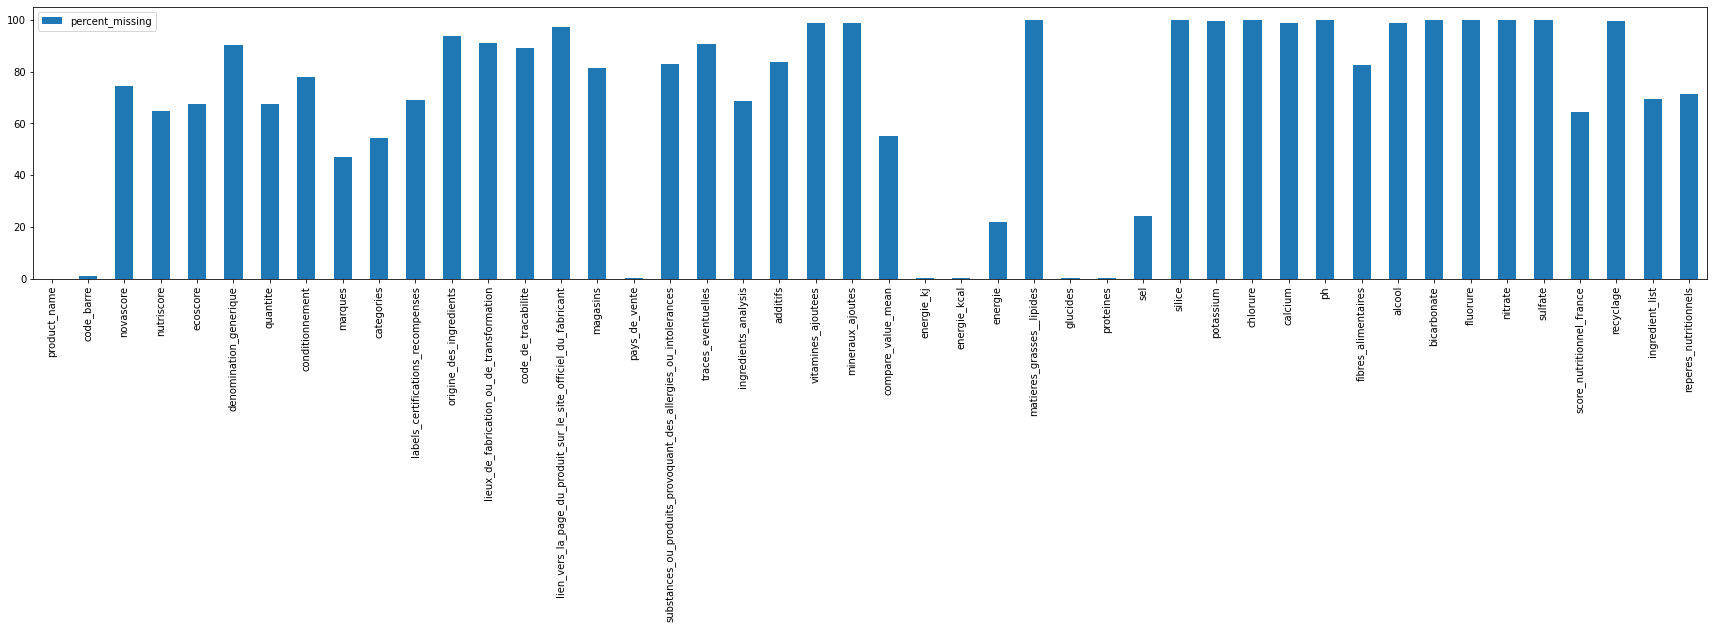

In [10]:
missing_value_df.plot(kind="bar", figsize=(30, 5)) #### graphe des valeurs manquantes

### Analyse

#### choix des columns pour l'analyse

In [11]:
df = df[['product_name', 
        'code_barre', 
        'novascore', 
        'nutriscore', 
        'ecoscore',
        'denomination_generique', 
        'quantite', 
        'conditionnement', 
        'marques',
        'categories', 
        'labels_certifications_recompenses',
        'origine_des_ingredients', 
        'lieux_de_fabrication_ou_de_transformation',
        'code_de_tracabilite',
        'lien_vers_la_page_du_produit_sur_le_site_officiel_du_fabricant',
        'magasins', 
        'pays_de_vente',
        'substances_ou_produits_provoquant_des_allergies_ou_intolerances',
        'traces_eventuelles', 
        'ingredients_analysis', 
        'additifs',
        'vitamines_ajoutees', 
        'mineraux_ajoutes', 
        'compare_value_mean', 
        'energie_kj', 
        'energie_kcal', 
        'energie',
        'recyclage', 
        'ingredient_list', 
        'reperes_nutritionnels']]

#### 1. Distribution du nombre de produits par catégorie Nutri Score, Nova et Eco score.( 5'*4*'5 = 100 possibilités)

In [12]:
df.groupby(['novascore', 'nutriscore', 'ecoscore']).size()

novascore  nutriscore  ecoscore
1          A           A           1045
                       B           3238
                       C           1276
                       D            458
                       E            296
                                   ... 
4          E           B           1700
                       C           3949
                       D           5515
                       E           4283
en:1       C           D              2
Length: 97, dtype: int64

<AxesSubplot:xlabel='novascore,nutriscore,ecoscore'>

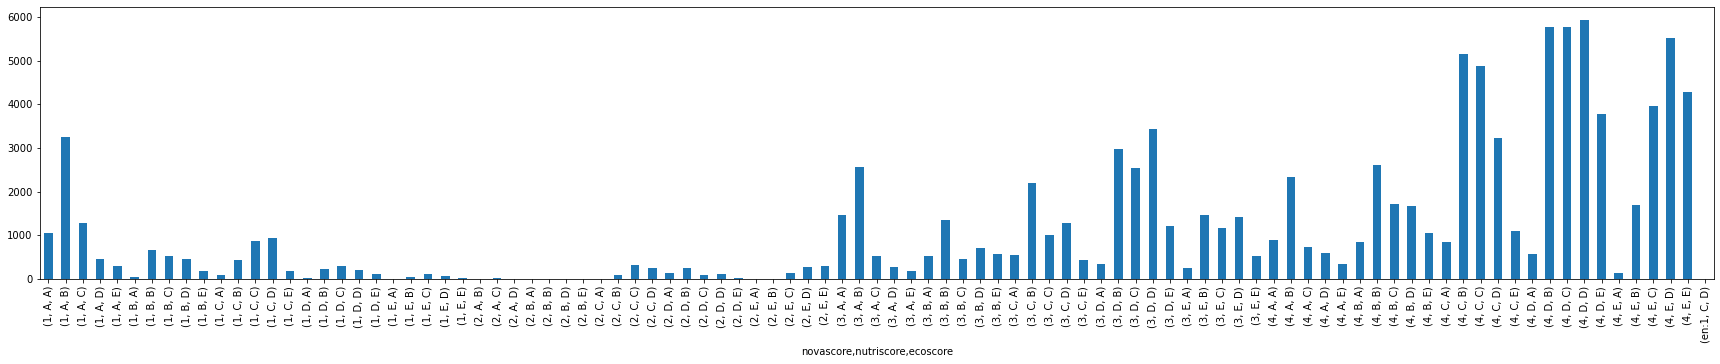

In [13]:
df.groupby(['novascore', 'nutriscore', 'ecoscore']).size().plot(kind="bar", figsize=(30, 5))

#### 2. Liste des produits ayant “gluten free” optimaux (Nutri score A, Nova 1 et Ecoscore A)

In [14]:
df_product_gluten_free = df[(df['novascore'] == '1') & (df['nutriscore'] == 'A') & (df['ecoscore'] == 'A')]
df_product_gluten_free

,product_name,code_barre,novascore,nutriscore,ecoscore,denomination_generique,quantite,conditionnement,marques,categories,...,additifs,vitamines_ajoutees,mineraux_ajoutes,compare_value_mean,energie_kj,energie_kcal,energie,recyclage,ingredient_list,reperes_nutritionnels
388,Panzani tomacouli nature - 200 g,3038352875066,1,A,A,Purée de tomates fraîches réduite à 7%,200 g,"tetra brik, carton muticouche, Brique",Panzani,"Aliments et boissons à base de végétaux, Alime...",...,E330 - Acide citrique,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,113 kj,27.0,113 kj(27 kcal),NaN,"Tomates fraîches, correcteur d'acidité : acide...",2.6 g Matières grasses / Lipides en quantité m...
389,Boisson végétale soja sans sucres - Bjorg - 1 L,3229820019604,1,A,A,"Boisson biologique à base de soja, stérilisée UHT",1 L,"Tetra Brik Aseptic, Foodsafe, FSC C014047, Poi...",Bjorg,"Aliments et boissons à base de végétaux, Boiss...",...,NaN,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,178 kj,43.0,178 kj(43 kcal),"1 brique carton à recycler, 1 bouchon plastiqu...","Tonyu* (eau, fèves de soja* sans OGM décortiqu...",0 g Matières grasses / Lipides en faible quant...
551,Compote Pomme Nature - Andros - 730 g,3608580789758,1,A,A,NaN,730 g,"Verre, Couvercle en métal, Bocal en verre",Andros,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,?,55.0,230 kj(55 kcal),NaN,"Pommes (purée et purée concentrée) 99,9 %, jus...",15.6 g Matières grasses / Lipides en quantité ...
1066,Panzani - bc - tomacouli nature bio - 250 g,3038352877008,1,A,A,Purée de tomates Bio réduite à 7%,250 g,"Brique, Carton",Panzani,"Aliments et boissons à base de végétaux, Alime...",...,E330 - Acide citrique,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,91 kj,22.0,91 kj(22 kcal),NaN,Purée de tomates issues de l'agriculture biolo...,0 g Matières grasses / Lipides en faible quant...
1070,Pomme Sans sucres ajoutés - Carrefour - 710 g,3245414620131,1,A,A,Purée de pomme sans sucres ajoutés*. *Contient...,710 g,"Bocal, Verre, Couvercle, Métal",Carrefour,"Aliments et boissons à base de végétaux, Alime...",...,E300 - Acide ascorbique\nE330 - Acide citrique,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,225 kj,53.0,225 kj(53 kcal),NaN,"Purée de pommes 98,5%, jus concentré de pommes...",17 g Matières grasses / Lipides en quantité mo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646070,farine de blé - T110 complète - biocoop - 1 kg,15120445,1,A,A,Farine de blé,1 kg,Papier,Biocoop,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,1 485 kj,350.0,1 485 kj(350 kcal),NaN,Farine de blé,NaN
668939,Lentille Blonde - épicerise - 400 g,3663859000637,1,A,A,NaN,400 g,boite en plastic,épicerise,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,?,292.0,1 222 kj(292 kcal),NaN,lentille blonde. Origine: import. Conditionné ...,NaN
681844,Champignons entiers - yofi - 800 g,3477320000312,1,A,A,NaN,800 g,Conserve,Yofi,"Aliments et boissons à base de végétaux, Alime...",...,E330 - Acide citrique,Acide L-ascorbique,NaN,Aliments et boissons à base de végétaux(88794 ...,?,85.0,356 kj(85 kcal),NaN,"No preservatives Ingrediénts: Champignons, eau...",NaN
725349,Tagliatelle Bio à base de haricots de soja noi...,3770011460052,1,A,A,Spécialité alimentaire à base de farine bio de...,200 g,"Sec, Carton",Fibritti,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,?,331.0,1 385 kj(331 kcal),NaN,"farine bio de haricot de soja noir, eau",NaN


#### 3. Nombre de produit dont le ratio sucre/produit est supérieur à 0.6

In [15]:
df['sucre'] = pd.to_numeric(df['reperes_nutritionnels'].str.split(',', expand=True)[2].str.split(' ', expand=True)[1] ,errors='coerce')

In [16]:
df[df['sucre'] > 0.6]

,product_name,code_barre,novascore,nutriscore,ecoscore,denomination_generique,quantite,conditionnement,marques,categories,...,vitamines_ajoutees,mineraux_ajoutes,compare_value_mean,energie_kj,energie_kcal,energie,recyclage,ingredient_list,reperes_nutritionnels,sucre
1,Nutella - Ferrero - 400 g,3017620422003,4,E,D,Pâte à tartiner aux noisettes et au cacao,400 g,"Verre, Couvercle, Plastique, Pot, Opercule, Pl...","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Aides cu...",...,NaN,NaN,"Produits à tartiner(20886 produits),Petit-déje...",2 252 kj,539.0,2 252 kj(539 kcal),"1 couvercle plastique blanc opaque PP à jeter,...","Sucre, huile de palme, noisettes 13%, lait écr...",30.9 g Matières grasses / Lipides en quantité ...,56.3
2,Prince Chocolat - Lu - 300 g,7622210449283,4,D,D,BISCUITS FOURRÉS (35%) PARFUM CHOCOLAT,300 g,"Plastique, Film en plastique, Paquet, Mondelez...",Lu,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",...,NaN,NaN,"Snacks(45766 produits),Snacks sucrés(23992 pro...",1 955 kj,465.0,1 955 kj(465 kcal),"1 Film plastique à jeter, 1 étui carton à recy...","céréales 50,7% (farine de blé 35%, farine de b...",17 g Matières grasses / Lipides en quantité mo...,32.0
3,Coca-Cola - 330 ml,5449000000996,4,E,NaN,Soda aux extraits végétaux,330 ml,aluminium-can,Coca-cola,"Boissons, Boissons gazeuses, Sodas, Sodas au c...",...,NaN,NaN,"Boissons(5961 produits),Boissons avec sucre aj...",180 kj,42.0,180 kj(42 kcal),NaN,"Eau gazéifiée, sucre, colorant : E150d, acidif...",0 g Matières grasses / Lipides en faible quant...,10.6
4,Nutella - Ferrero - 1 kg,3017620425035,4,E,D,Pâte à tartiner aux noisettes,1 kg,"Pot, Verre, Couvercle, Plastique, Carton, Plaque","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Produits...",...,NaN,NaN,"Produits à tartiner(20886 produits),Petit-déje...",2 252 kj,539.0,2 252 kj(539 kcal),1 couvercle en plastique blanc opaque PP à jet...,"Sucre, huile de palme, NOISETTES 13%, LAIT écr...",30.9 g Matières grasses / Lipides en quantité ...,56.3
5,"Muesli Raisin, Figue, Abricot - Bjorg - 375 g ℮",3229820129488,1,A,B,"Mélange biologique de céréales, de fruits et d...",375 g ℮,"Sachet, Plastique, Pensez au tri!, Point vert,...",Bjorg,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,1 440 kj,341.0,1 440 kj(341 kcal),1 SACHET PLASTIQUE A JETER,"Flocons d'avoine* 44%, flocons d'épeautre* (bl...",6.3 g Matières grasses / Lipides en quantité m...,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550482,Merguez boeuf mouton - Saveur Des Mauges,3340584105836,NaN,E,E,NaN,NaN,NaN,Saveur Des Mauges,"Viandes, Charcuteries, Saucisses, Merguez",...,NaN,NaN,"Viandes(22375 produits),Charcuteries(3979 prod...",?,307.0,1 284 kj(307 kcal),NaN,IngrédJenE:viande bovifie origine France(48Y.)...,27 g Matières grasses / Lipides en quantité él...,1.4
550489,Assortiment Chipolatas X12 - Charcuteries bahier,3340584106437,4,E,E,NaN,NaN,NaN,"Charcuteries bahier, Charcuterie gilbert","Viandes, Charcuteries, Saucisses, Saucisses fr...",...,NaN,NaN,"Viandes(22375 produits),Charcuteries(3979 prod...",?,268.0,1 121 kj(268 kcal),NaN,Chipolatas : Epaule de porc origine France (92...,22 g Matières grasses / Lipides en quantité él...,0.8
550491,Boudin Blanc à l'Ancienne (* 8) - Sans marque ...,3340584106864,3,D,C,NaN,960 g,"Frais, Plastique",Sans marque,"Viandes, Charcuteries, Poissons et viandes et ...",...,NaN,NaN,"Viandes(22375 produits),Charcuteries(3420 prod...",775 kj,0.0,775 kj(185 kcal),NaN,Poitrine de porc et épaule de porc origine Fra...,14 g Matières grasses / Lipides en quantité mo...,3.6
550492,Boudin blanc cocktail - Saveur des Mauges,3340584106963,NaN,E,D,NaN,NaN,NaN,Saveur des Mauges,"Viandes, Charcuteries, Poissons et viandes et ...",...,NaN,NaN,"Viandes(22375 produits),Charcuteries(3420 prod...",?,303.0,1 268 kj(303 kcal),NaN,NaN,27 g Matières grasses / Lipides en quantité él...,1.9


#### 4. Liste des produits dont le nombre de calories pour 100g est supérieur à 500.

In [17]:
df[df['energie_kcal'] > 0.5]

,product_name,code_barre,novascore,nutriscore,ecoscore,denomination_generique,quantite,conditionnement,marques,categories,...,vitamines_ajoutees,mineraux_ajoutes,compare_value_mean,energie_kj,energie_kcal,energie,recyclage,ingredient_list,reperes_nutritionnels,sucre
1,Nutella - Ferrero - 400 g,3017620422003,4,E,D,Pâte à tartiner aux noisettes et au cacao,400 g,"Verre, Couvercle, Plastique, Pot, Opercule, Pl...","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Aides cu...",...,NaN,NaN,"Produits à tartiner(20886 produits),Petit-déje...",2 252 kj,539.0,2 252 kj(539 kcal),"1 couvercle plastique blanc opaque PP à jeter,...","Sucre, huile de palme, noisettes 13%, lait écr...",30.9 g Matières grasses / Lipides en quantité ...,56.3
2,Prince Chocolat - Lu - 300 g,7622210449283,4,D,D,BISCUITS FOURRÉS (35%) PARFUM CHOCOLAT,300 g,"Plastique, Film en plastique, Paquet, Mondelez...",Lu,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",...,NaN,NaN,"Snacks(45766 produits),Snacks sucrés(23992 pro...",1 955 kj,465.0,1 955 kj(465 kcal),"1 Film plastique à jeter, 1 étui carton à recy...","céréales 50,7% (farine de blé 35%, farine de b...",17 g Matières grasses / Lipides en quantité mo...,32.0
3,Coca-Cola - 330 ml,5449000000996,4,E,NaN,Soda aux extraits végétaux,330 ml,aluminium-can,Coca-cola,"Boissons, Boissons gazeuses, Sodas, Sodas au c...",...,NaN,NaN,"Boissons(5961 produits),Boissons avec sucre aj...",180 kj,42.0,180 kj(42 kcal),NaN,"Eau gazéifiée, sucre, colorant : E150d, acidif...",0 g Matières grasses / Lipides en faible quant...,10.6
4,Nutella - Ferrero - 1 kg,3017620425035,4,E,D,Pâte à tartiner aux noisettes,1 kg,"Pot, Verre, Couvercle, Plastique, Carton, Plaque","Ferrero, Nutella","Produits à tartiner, Petit-déjeuners, Produits...",...,NaN,NaN,"Produits à tartiner(20886 produits),Petit-déje...",2 252 kj,539.0,2 252 kj(539 kcal),1 couvercle en plastique blanc opaque PP à jet...,"Sucre, huile de palme, NOISETTES 13%, LAIT écr...",30.9 g Matières grasses / Lipides en quantité ...,56.3
5,"Muesli Raisin, Figue, Abricot - Bjorg - 375 g ℮",3229820129488,1,A,B,"Mélange biologique de céréales, de fruits et d...",375 g ℮,"Sachet, Plastique, Pensez au tri!, Point vert,...",Bjorg,"Aliments et boissons à base de végétaux, Alime...",...,NaN,NaN,Aliments et boissons à base de végétaux(88794 ...,1 440 kj,341.0,1 440 kj(341 kcal),1 SACHET PLASTIQUE A JETER,"Flocons d'avoine* 44%, flocons d'épeautre* (bl...",6.3 g Matières grasses / Lipides en quantité m...,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803707,Tablette lindt dessert 70%,3046920021463,NaN,NaN,NaN,NaN,NaN,NaN,Lindt,NaN,...,NaN,NaN,NaN,?,537.0,2 247 kj(537 kcal),NaN,NaN,NaN,NaN
803720,Chèvre frais - Atelier fromagerie,3664335052256,NaN,NaN,NaN,NaN,NaN,NaN,Atelier fromagerie,NaN,...,NaN,NaN,NaN,?,204.0,854 kj(204 kcal),NaN,NaN,NaN,NaN
803724,Barre repas minceur - Healtheen,3760320792531,NaN,NaN,NaN,NaN,NaN,NaN,Healtheen,NaN,...,NaN,NaN,NaN,?,370.0,1 548 kj(370 kcal),NaN,NaN,NaN,NaN
803726,Pain croquant suédois complet de seigle - Ekoland,3758812348335,NaN,NaN,NaN,NaN,NaN,NaN,Ekoland,NaN,...,NaN,NaN,NaN,?,338.0,1 414 kj(338 kcal),NaN,NaN,NaN,NaN


#### 5. Liste des produits contenant de l’huile de palme, vendu en France et en Belgique

In [18]:
mask1 = df['ingredient_list'].str.contains('huile de palme')
mask2 = df['pays_de_vente'].str.contains('France')
mask3 = df['pays_de_vente'].str.contains('Belgique')
df[mask1 & mask2 & mask3]['pays_de_vente']

1         Algérie, Autriche, Belgique, Canada, France, A...
4         Algérie, Belgique, France, Allemagne, Guadelou...
7         Algérie, Belgique, France, Allemagne, Italie, ...
25                     Belgique, France, La Réunion, Suisse
29        Algérie, Belgique, Canada, France, Allemagne, ...
                                ...                        
612748                                     Belgique, France
618177                                     Belgique, France
623654                                     Belgique, France
625088                                     Belgique, France
664024                                     Belgique, France
Name: pays_de_vente, Length: 343, dtype: object

#### 6. Distribution des produits par nombre de pays de vente

In [19]:
df = df.where(pd.notnull(df), 'nan')

In [20]:
df['nbr_pays_vente'] = df['pays_de_vente'].map(lambda x:len(x.split(',')))

In [21]:
df[['product_name', 'nbr_pays_vente']].sort_values('nbr_pays_vente', ascending=False)

,product_name,nbr_pays_vente
358141,Barra con Proteína - Herbalife - 560g,113
110416,Formula 1 nutritional shake mix fragola deligh...,110
296734,CR7 Drive - Herbalife - 13.5g,110
23213,Mélange pour boisson protéinée - Herbalife - 5...,110
70559,herbalife formule 1 sport - 524 g,109
...,...,...
289397,"Betterave Rouge Épluchée Lunor, x1",1
289398,"Infusion après repas - U - 20 sachets, boîte d...",1
289399,"Crème glacée vanille, noix de pécan et caramel...",1
289400,Goûters Fourrés Parfum Vanille - U - 300 g,1


#### 7. Les produits pour les personnes ayant un régime alimentaire particulier (Non végétarien)

In [22]:
df[df['ingredients_analysis'].str.contains('Non végétalien')][['product_name', 'ingredients_analysis']]

,product_name,ingredients_analysis
1,Nutella - Ferrero - 400 g,"Huile de palme, ,,Non végétalien, ,,→ L'analys..."
2,Prince Chocolat - Lu - 300 g,"Huile de palme, ,,Non végétalien, ,,→ L'analys..."
4,Nutella - Ferrero - 1 kg,"Huile de palme, ,,Non végétalien, ,,→ L'analys..."
6,Biscuit Sésame - Gerblé - 230 g,"Sans huile de palme, ,,Non végétalien, ,,→ L'a..."
7,Nutella biscuits - Ferrero - 304 g,"Huile de palme, ,,Non végétalien, ,,→ L'analys..."
...,...,...
803597,Bénénuts Petits Fondants mix salé + emmental 3...,"Sans huile de palme, ,,Non végétalien, ,,Peut-..."
803598,Lay's saveur spicy 3 x 130 g + 1 offert - Lays...,"Non végétalien, ,,→ L'analyse est basée unique..."
803599,Bénénuts 3D's Bugles goût cacahuète 5 x 85 g +...,"Non végétalien, ,,→ L'analyse est basée unique..."
803601,Lay's saveur fromage 3 x 130 g + 1 offert - La...,"Non végétalien, ,,→ L'analyse est basée unique..."


#### 8. Les produits du magasin Auchan

In [23]:
df[df['magasins'].str.contains('Auchan')][['product_name', 'code_barre', 'quantite', 'categories', 'marques']]

,product_name,code_barre,quantite,categories,marques
0,"Cristaline Eau de source - 1,5 l",3274080005003,"1,5 l","Boissons, Eaux, Eaux de sources, Eaux minérale...",Cristaline
1,Nutella - Ferrero - 400 g,3017620422003,400 g,"Produits à tartiner, Petit-déjeuners, Aides cu...","Ferrero, Nutella"
2,Prince Chocolat - Lu - 300 g,7622210449283,300 g,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...",Lu
3,Coca-Cola - 330 ml,5449000000996,330 ml,"Boissons, Boissons gazeuses, Sodas, Sodas au c...",Coca-cola
4,Nutella - Ferrero - 1 kg,3017620425035,1 kg,"Produits à tartiner, Petit-déjeuners, Produits...","Ferrero, Nutella"
...,...,...,...,...,...
802530,Feuilles d'épinards les natures - Auchan,3596710453788,nan,nan,Auchan
802539,Crème fluide 30 % matière grasse - Auchan,0590470381971,nan,nan,Auchan
802674,Pain complet integral - Auchan - 300 g,030508079596,300 g,"Aliments et boissons à base de végétaux, Alime...",Auchan
802972,vinaigre basalmique bio - auchan,596710324453,nan,nan,Auchan


#### 9. Les produits avec le meilleur nutriscore et ecoscore

In [24]:
df[(df['nutriscore'] == 'A')&(df['ecoscore'] == 'A')]

,product_name,code_barre,novascore,nutriscore,ecoscore,denomination_generique,quantite,conditionnement,marques,categories,...,mineraux_ajoutes,compare_value_mean,energie_kj,energie_kcal,energie,recyclage,ingredient_list,reperes_nutritionnels,sucre,nbr_pays_vente
39,Wasa tartine croustillante fibres - 230 g,7300400481588,3,A,A,Produit de boulangerie au seigle riche en fibr...,230 g,"Papier, Enveloppe",Wasa,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,1 396 kj,333,1 396 kj(333 kcal),nan,"Farine complète de seigle (57 g*), son de blé ...",5 g Matières grasses / Lipides en quantité mod...,2,8
71,Wasa tartine croustillante authentique au seig...,7300400481595,3,A,A,Produit de boulangerie a la farine de seigle,275 g,"Papier, Package paper, Paper recycling, Papier...",Wasa,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,1 406 kj,334,1 406 kj(334 kcal),nan,"Farine complète de SEIGLE (77 g*), farine de S...",1.5 g Matières grasses / Lipides en faible qua...,1,4
93,Léger - Wasa - 270 g,7300400481571,3,A,A,Produit de boulangerie a la farine complète de...,270 g,"papier, Point vert, Package paper - paper recy...",Wasa,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,1 450 kj,344,1 450 kj(344 kcal),nan,"Farine complète de SEIGLE, sel. Peut contenir ...",22 g Matières grasses / Lipides en quantité él...,23,4
173,Yaourt soja végétal à la vanille - Alpro - 500 g,5411188103387,4,A,A,nan,500 g,"Pot et couverture plastique, Carton, Point ver...",Alpro,"Desserts, Produits fermentés, Desserts végétal...",...,Phosphate de calcium,"Produits fermentés(16507 produits),Desserts(55...",280 kj,66,280 kj(66 kcal),nan,"Base de soja (eau, fèves de soja sans OGM déco...",12 g Matières grasses / Lipides en quantité mo...,23,9
179,Nature aux Amandes - Végétal soja & amande - A...,5411188118961,nan,A,A,Produit fermenté à base de soja avec amandes c...,500 gr,"Triman, Point vert, Pensez au tri!, Pot et cou...",Alpro,"Desserts, Produits fermentés, Desserts végétal...",...,nan,"Produits fermentés(16507 produits),Desserts(55...",226 kj,54,226 kj(54 kcal),nan,"Eau, fèves de soja décortiquées (7,8%), sucre,...",7 g Matières grasses / Lipides en quantité mod...,0.7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775682,Champignons de paris entiers 1er choix - Notre...,3564700491355,3,A,A,nan,230 g net égoutté,Conserve,Notre Jardin,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,?,64,268 kj(64 kcal),nan,"Champignons de Paris, eau, sel, acidifiant : a...",nan,nan,1
775766,La purée de pommes bio - Juliet - 840g,3760190653444,nan,A,A,Purée de pommes,840g,Verre,Juliet,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,247 kj,59,247 kj(59 kcal),nan,nan,nan,nan,1
778092,Tomates concassées - Winny,5400247029713,nan,A,A,nan,nan,Conserve,Winny,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,86 kj,20,86 kj(20 kcal),nan,nan,nan,nan,1
780918,Duo haricots verts et beurre - Paysan Breton -...,3184043278905,1,A,A,"Mélange de légumes, surgelé",750 g,"Sachet, Surgelé, Portionnable, Déjà Cuit",Paysan Breton,"Aliments et boissons à base de végétaux, Alime...",...,nan,Aliments et boissons à base de végétaux(88794 ...,151 kj,36,151 kj(36 kcal),nan,"Haricots verts 48%, haricots beurre 32%.",nan,nan,1


#### 10. les produits avec Sucres en quantité élevée

In [25]:
df['reperes_nutritionnels'] = df['reperes_nutritionnels'].replace(np.nan, 'nan')

In [26]:
df_reperes_nutritionnels = df[df['reperes_nutritionnels'].str.contains('Sucres en quantité élevée')]

In [35]:
df_sucre = df_reperes_nutritionnels[['product_name','reperes_nutritionnels']]
df_sucre

,product_name,reperes_nutritionnels
1,Nutella - Ferrero - 400 g,30.9 g Matières grasses / Lipides en quantité ...
2,Prince Chocolat - Lu - 300 g,17 g Matières grasses / Lipides en quantité mo...
3,Coca-Cola - 330 ml,0 g Matières grasses / Lipides en faible quant...
4,Nutella - Ferrero - 1 kg,30.9 g Matières grasses / Lipides en quantité ...
5,"Muesli Raisin, Figue, Abricot - Bjorg - 375 g ℮",6.3 g Matières grasses / Lipides en quantité m...
...,...,...
550430,Pâtes de fruits - Cruzilles,0.2 g Matières grasses / Lipides en faible qua...
550447,Broyé du poitou - Biscuiterie Augureau - 560g,23.1 g Matières grasses / Lipides en quantité ...
550448,Mini broyé du poitou - - 500g,23.1 g Matières grasses / Lipides en quantité ...
550455,Pralines Roses - Médicis - 200 g,21.5 g Matières grasses / Lipides en quantité ...


In [36]:
df_sucre['product_name'].count()

75072